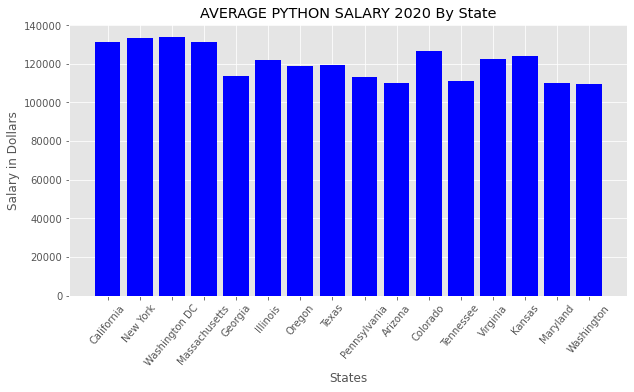

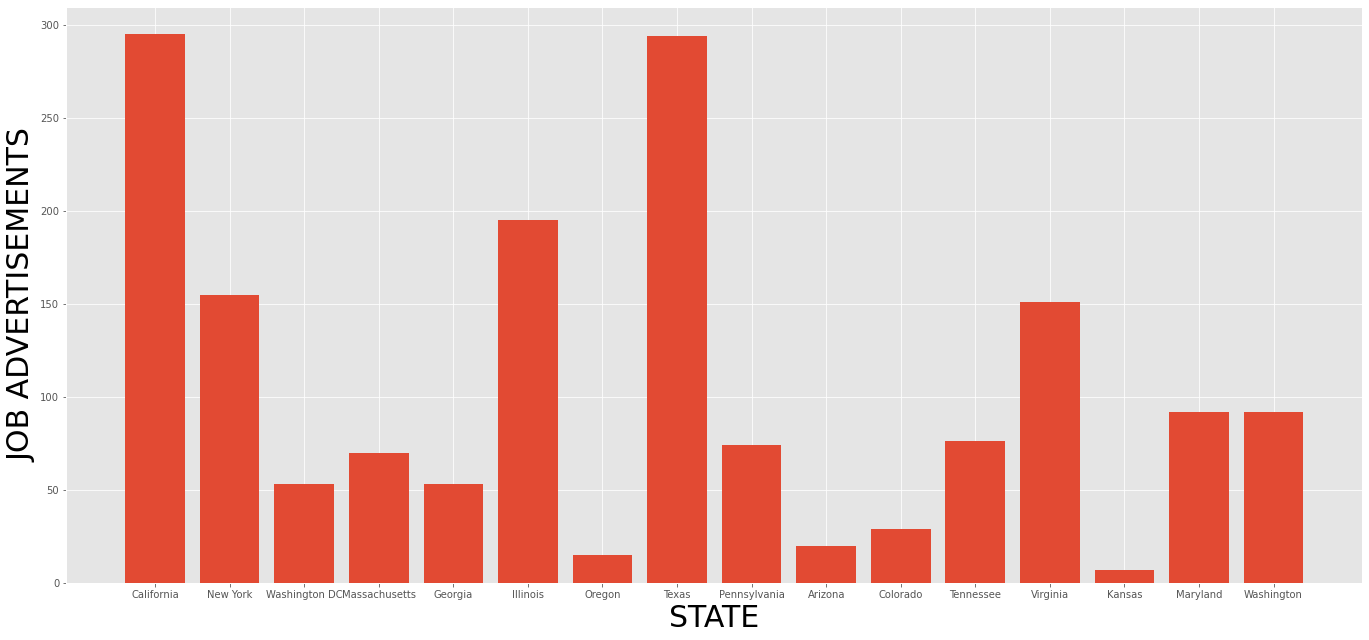

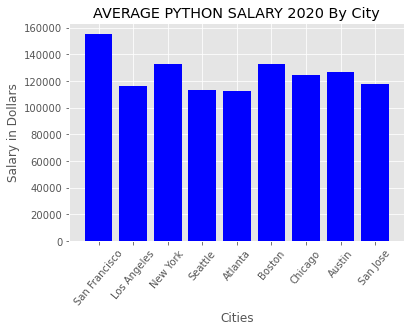

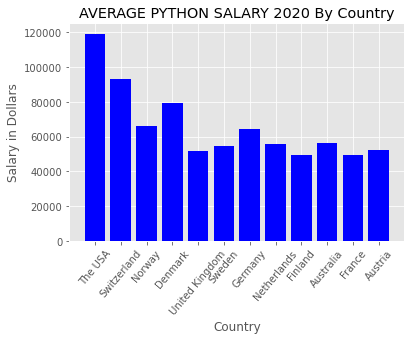

In [7]:
import requests
from bs4 import BeautifulSoup
import csv

import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick

def parse_column_title(data):
   column_titles = data.find_all('strong')
   titles = [title.text for title in column_titles]
   return titles

def write_to_csv(filename, titles, parsed_data):
   with open(filename, mode='w+') as file:
       data_writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
       data_writer.writerow(titles)

       for row in parsed_data:
           data = row.find_all('td')
           data_row = [td.text.strip() for td in data]
           data_writer.writerow(data_row)

def scrape_data():
   url = 'https://www.daxx.com/blog/development-trends/python-developer-salary-usa#:~:text=contact%20us-,Average%20Python%20Developer%20Salary%20in%20the%20US%20and%20World%20in,Is%20Python%20Programming%20So%20Popular%3F&text=According%20to%20Indeed%2C%20the%20average,in%20the%20USA%20is%20%2488%2C492.'
   r = requests.get(url)

   soup = BeautifulSoup(r.content, 'html5lib') 
   web_content = soup.find(class_='col-sm-12 col-md-8')
   table_data = soup.find_all('tbody')

   # Average Python Developer Salary by State 2020
   salary_data_state = table_data[0]
   salary_titles = parse_column_title(salary_data_state)

   salary_data = salary_data_state.find_all('tr')
   salary_data = salary_data[1:]
   filename = 'average_salary_state.csv'
   write_to_csv(filename, salary_titles, salary_data)

   # Highest Paying Cities for Python Developers in the US
   cities_data = table_data[1]
   cities_titles = parse_column_title(cities_data)

   cities_salary_data = cities_data.find_all('tr')
   cities_salary_data = cities_salary_data[1:]
   filename = 'average_salary_cities.csv'
   write_to_csv(filename, cities_titles, cities_salary_data)

   # Average Python Developer Salary in the World
   world_data = table_data[2]
   world_titles = parse_column_title(world_data)

   world_salary_data = world_data.find_all('tr')
   world_salary_data = world_salary_data[1:]
   filename = 'average_salary_world.csv'
   write_to_csv(filename, world_titles, world_salary_data)

scrape_data()

# salary state
data1 = pd.read_csv('average_salary_state.csv')

salary_data = []
for row in data1["Average Python salary 2020"]:
    row = row.replace(',', '')
    row = row.replace('$', '')
    row = int(row)
    salary_data.append(row)

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))

x=data1["State"]
y=salary_data
z=data1["Employees, users, and past/ present job ads"]

x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, y, color='blue')

plt.xlabel("States")
plt.ylabel("Salary in Dollars")
plt.title("AVERAGE PYTHON SALARY 2020 By State")
plt.xticks(x_pos, x, rotation="50")

plt.show()


fig = plt.figure()
ax = fig.add_axes([0,0,3,2])
ax.bar(x,z)

ax.set_xlabel('STATE', fontsize=30, color='black') 
ax.set_ylabel('JOB ADVERTISEMENTS', fontsize=30, color='black')
plt.show()


# salary cities
data1 = pd.read_csv('average_salary_cities.csv')

salary_data = []
for row in data1["Average Salary 2020"]:
    row = row.replace(',', '')
    row = row.replace('$', '')
    row = int(row)
    salary_data.append(row)

plt.style.use('ggplot')

x=data1["City"]
y=salary_data

x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, y, color='blue')

plt.xlabel("Cities")
plt.ylabel("Salary in Dollars")
plt.title("AVERAGE PYTHON SALARY 2020 By City")
plt.xticks(x_pos, x, rotation="50")

plt.show()


# salary world
data1 = pd.read_csv('average_salary_world.csv')

salary_data = []
for row in data1["Python developer salary"]:
    row = row.replace(',', '')
    row = row.replace('$', '')
    row = int(row)
    salary_data.append(row)

plt.style.use('ggplot')

x=data1["Country"]
y=salary_data

x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, y, color='blue')

plt.xlabel("Country")
plt.ylabel("Salary in Dollars")
plt.title("AVERAGE PYTHON SALARY 2020 By Country")
plt.xticks(x_pos, x, rotation="50")

plt.show()